# Load Data

In [ ]:
import pandas as pd
import numpy as np
#loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exploratory Data Analysis (EDA)



In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


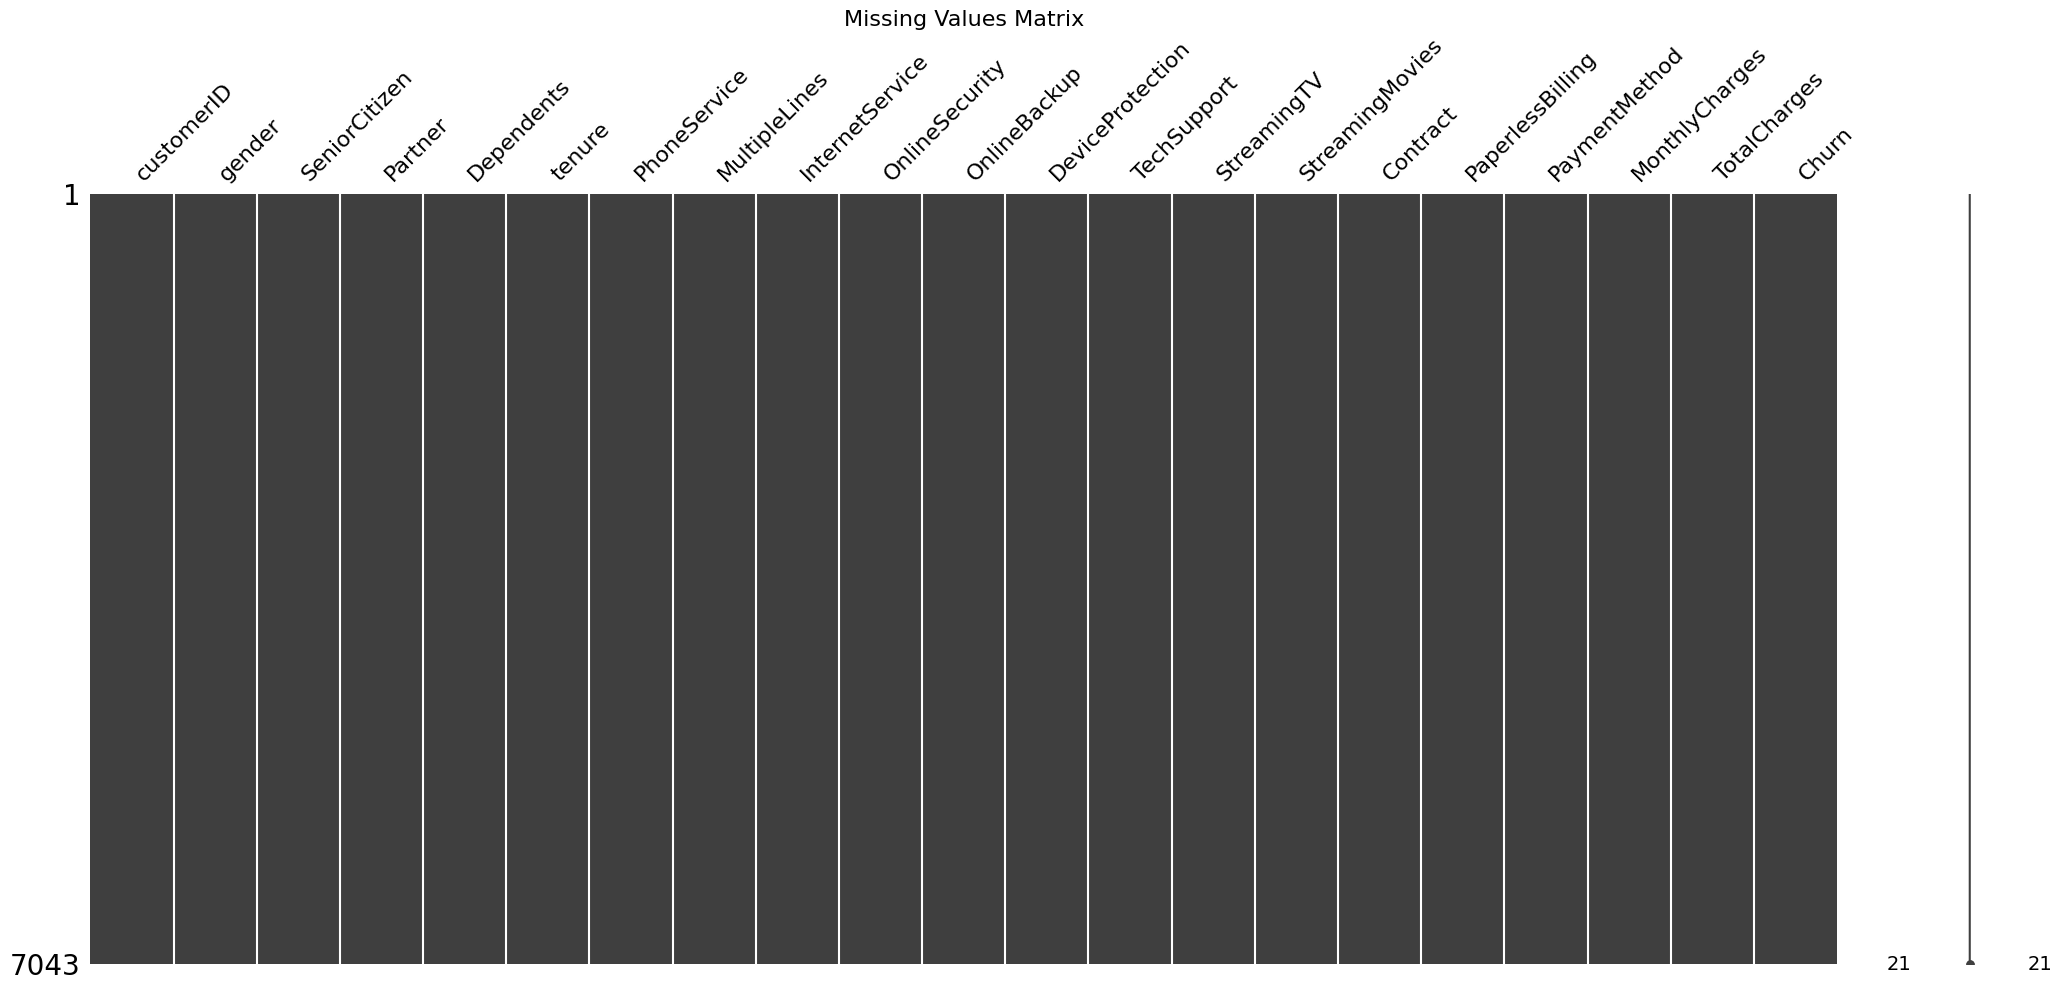

In [ ]:
# Visualizing missing values using missingno
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.title("Missing Values Matrix", fontsize=16)
plt.show()

In [ ]:
# Check missing values in each column
missing_values_count = df.isnull().sum()

# Display the count
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check for null values after conversion
print(df['TotalCharges'].isnull().sum())

11


In [ ]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
df.shape

(7032, 21)

In [ ]:
# Use pandas' replace method for mapping binary values to categories
df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: "No", 1: "Yes"})
print(df.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessB

In [ ]:
df["InternetService"].describe()

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


<Axes: xlabel='InternetService', ylabel='count'>

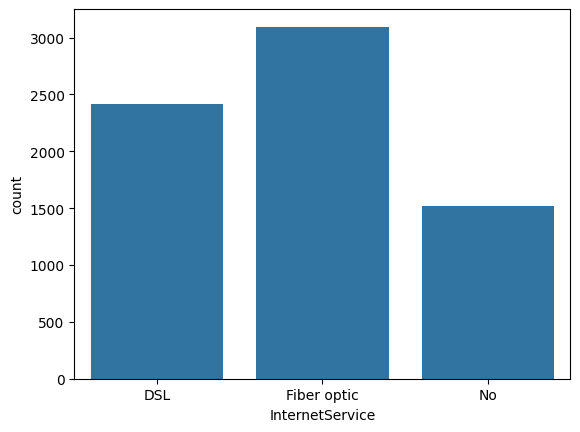

In [ ]:
import seaborn as sns
sns.countplot(data=df, x="InternetService")

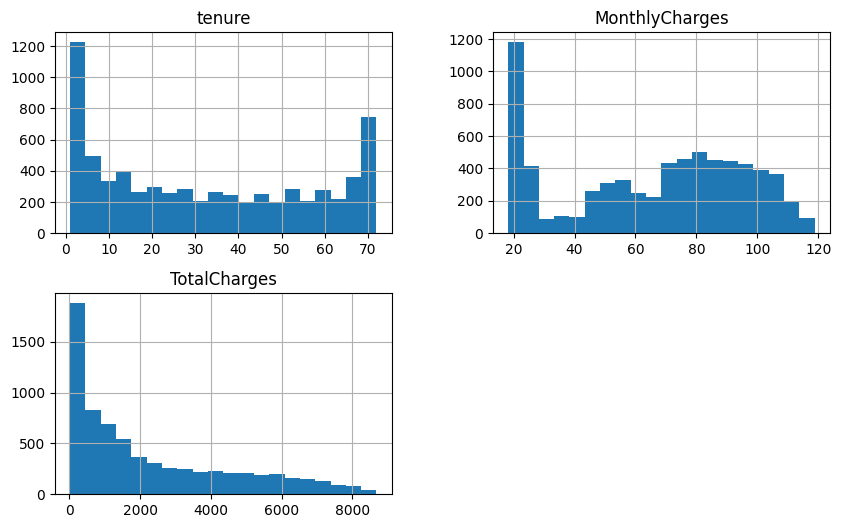

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Define 'numerical_cols' with the names of numerical columns in your DataFrame
numerical_cols = ['tenure','MonthlyCharges','TotalCharges'] # Replace with actual numerical column names

df[numerical_cols].hist(bins=20, figsize=(10, 6))
plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Dynamically retrieve unique labels for Gender and Churn
g_labels = df['gender'].unique()
c_labels = df['Churn'].unique()

# Create subplots with 'domain' type for Pie charts
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Add pie charts for Gender and Churn
fig.add_trace(go.Pie(
    labels=g_labels,
    values=df['gender'].value_counts(),
    name="Gender",
    marker=dict(colors=['#636EFA', '#EF553B']),  # Customize colors
), 1, 1)

fig.add_trace(go.Pie(
    labels=c_labels,
    values=df['Churn'].value_counts(),
    name="Churn",
    marker=dict(colors=['#00CC96', '#AB63FA']),  # Customize colors
), 1, 2)

# Use `hole` to create donut-like pie charts
fig.update_traces(hole=0.4, hoverinfo="label+percent+name", textfont_size=16)

# Update layout with title, annotations, and responsive design
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[
        dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False),
        dict(text='Churn', x=0.82, y=0.5, font_size=20, showarrow=False)
    ],
    height=600,
    width=1000,
    showlegend=True  # Add legend for better readability
)

# Display the plot
fig.show()

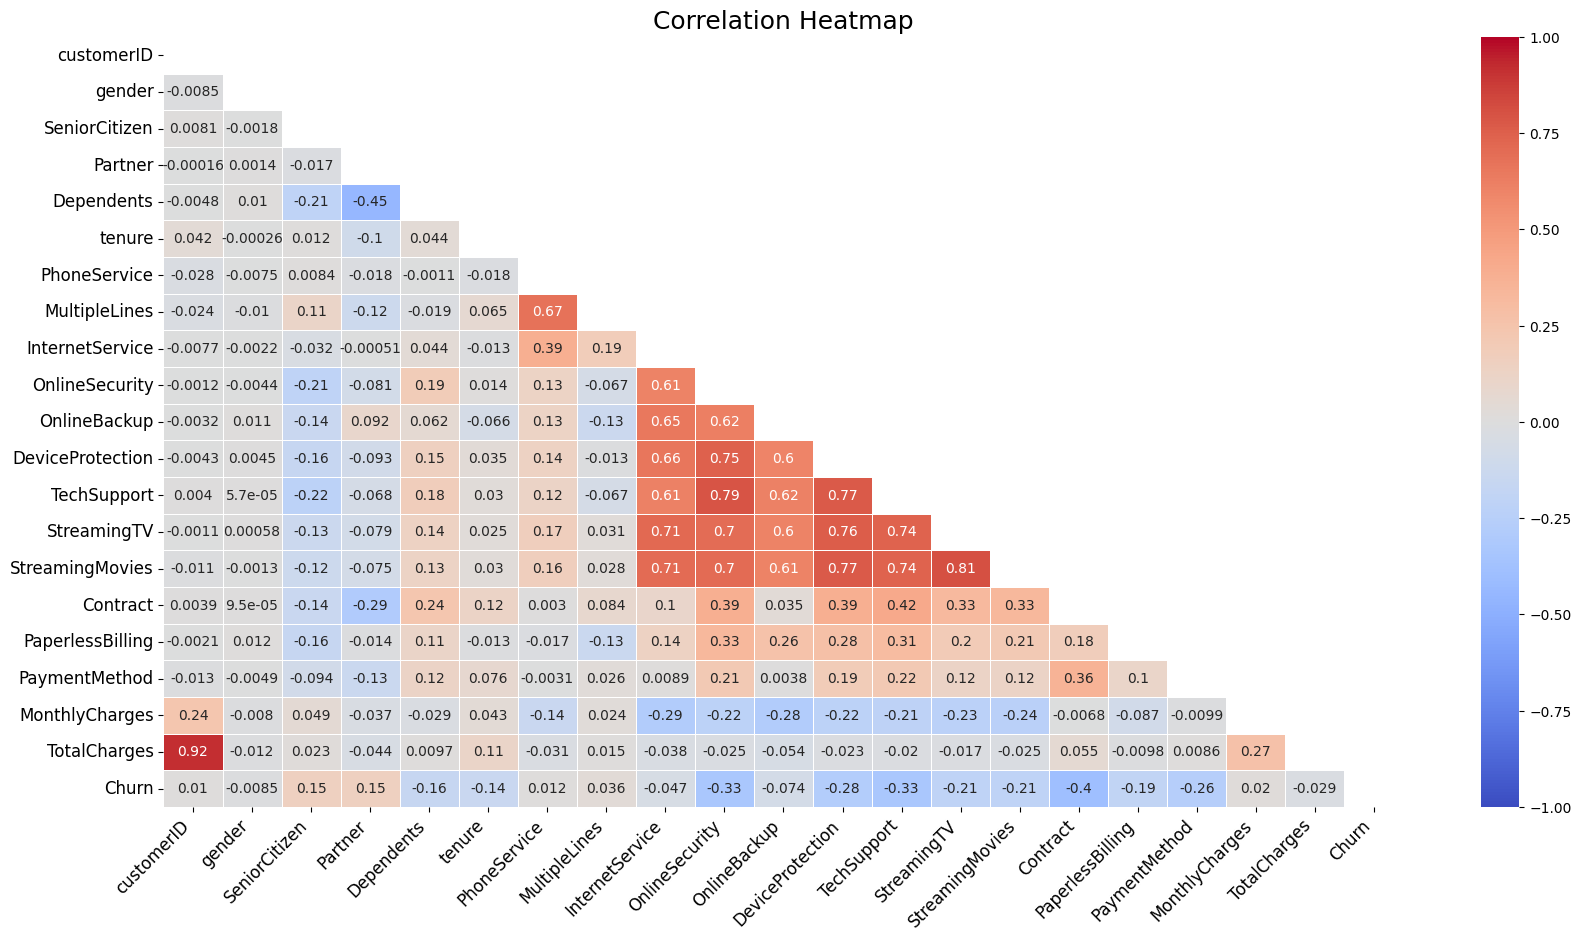

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Compute correlation after factorizing
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap
ax = sns.heatmap(
    corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
    linewidths=0.5, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10}
)

# Title and axis adjustments
plt.title('Correlation Heatmap', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Show the plot
plt.show()

# Data Spliting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to convert object columns to integers using LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':  # Check if the column is of type 'object'
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

# Apply the function to all columns in the DataFrame
df = df.apply(lambda x: object_to_int(x))  # Transforms all object columns to integers
df.head()

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn'].values  # Target variable as a NumPy array

# Train-test split with stratified sampling to ensure class balance in splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40, stratify=y
)

# Categorize columns for different preprocessing methods
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns  # Numerical columns
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']  # Columns for one-hot encoding
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))
# Columns for label encoding: exclude numerical and OHE columns

# Standardize numerical columns
scaler = StandardScaler()  # Instantiate the scaler
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])  # Fit and transform train set
X_test[num_cols] = scaler.transform(X_test[num_cols])  # Transform test set

# Models

In [ ]:
# Function to visualize the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.show()

# Logistic Regression

--- Logistic Regression Results ---
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110

ROC-AUC Score: 0.8580212177599488


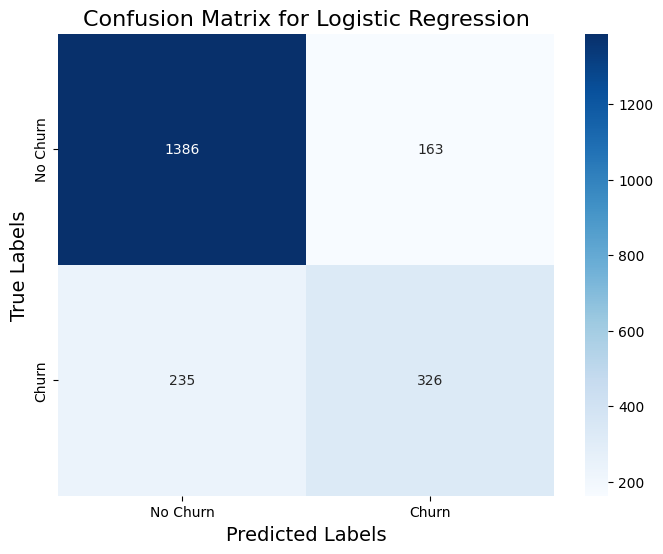

In [ ]:
log_reg = LogisticRegression(random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("--- Logistic Regression Results ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_log_reg))

# Visualize the confusion matrix
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")

# Random Forest

--- Random Forest Results ---
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110

ROC-AUC Score: 0.8431602701530169


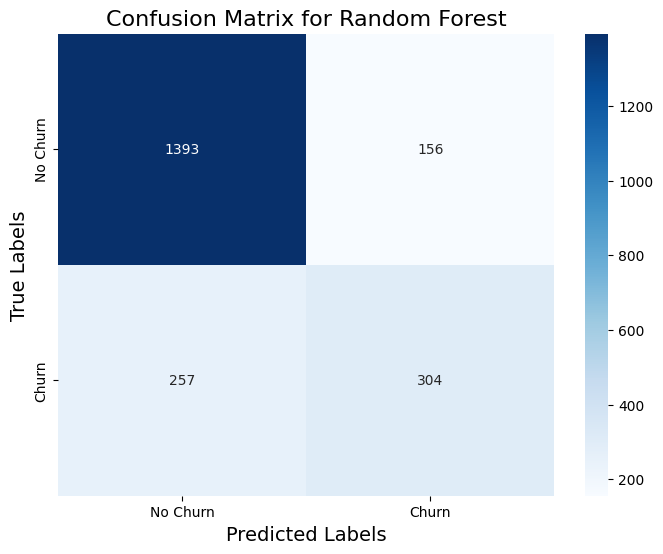

In [ ]:
# Instantiate the model
random_forest = RandomForestClassifier(random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Evaluate the model
print("--- Random Forest Results ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

# Visualize the confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[11:51:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




--- XGBoost Results ---
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.60      0.54      0.57       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

ROC-AUC Score: 0.8250432399029217


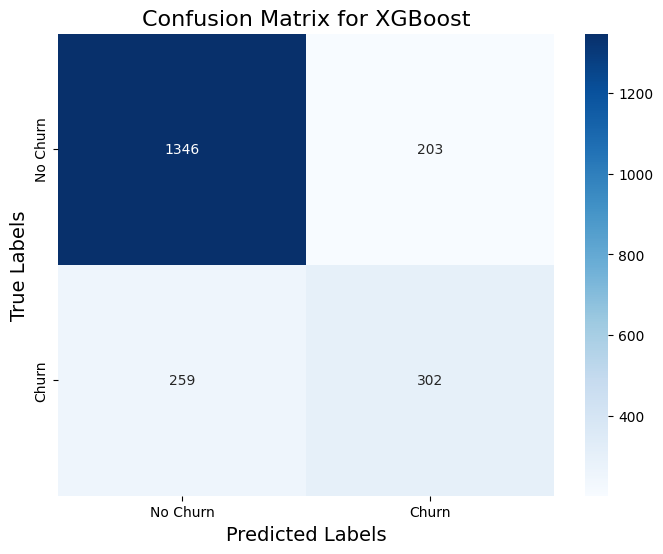

In [ ]:
# Instantiate the model
xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgboost.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost.predict(X_test)
y_pred_proba_xgb = xgboost.predict_proba(X_test)[:, 1]

# Evaluate the model
print("--- XGBoost Results ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))

# Visualize the confusion matrix
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")